In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp, enums as viz_enums
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types
from pathlib import Path

In [31]:
demand = dummy_data.create_dummy_site_demand(2022)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)
bender_submeters.head()

,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Datetime,,,,,,,,
2022-01-01 00:00:00,7.569785,0.576742,0.039946,0.585969,0.025802,1.261809,0.429955,0.052258
2022-01-01 00:30:00,6.771641,0.497238,0.041149,0.586528,0.025639,1.261356,0.432854,0.051954
2022-01-01 01:00:00,8.596677,0.554560,0.117282,0.585901,0.025691,1.260377,0.456698,0.051572
2022-01-01 01:30:00,7.786236,0.495641,0.039423,0.586005,0.025465,1.261335,0.423382,0.051665
2022-01-01 02:00:00,6.929411,0.558504,0.039517,0.586479,0.025546,1.263387,0.389958,0.051862


### Data cleaner

In [32]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(bender_submeters, cleaner_list)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694


Post cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369,0.025243,1.203781,0.509493,0.177645
StD,3.616988,0.173279,0.580963,0.072358,0.002469,0.083532,0.122784,0.330845
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.018813,1.060478,0.384565,0.040023
25%,0.793048,0.611870,0.038633,0.580715,0.024502,1.149817,0.422485,0.046129
50%,2.446349,0.673542,0.040107,0.668476,0.025496,1.220203,0.482347,0.050143
75%,6.058010,0.775172,0.216827,0.685800,0.026099,1.269096,0.548906,0.116300
99%,13.523658,1.259118,2.419109,0.830969,0.033966,1.307534,1.018762,1.767503


In [33]:
sub_set_1 = bender_submeters.iloc[:, :4]
sub_set_2 = bender_submeters.iloc[:, 4:]

test_data_prep = sdp.DataPrep(sub_set_1,
                      cleaner_list)

test_2 = sdp.DataPrep(sub_set_2,
                      cleaner_list)

test_data_prep = test_data_prep.concat(test_2)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,4.197614,0.833613,0.682970,0.640112
StD,4.335921,0.379993,1.065927,0.078980
Min,0.238472,0.430443,0.035838,0.453167
1%,0.313950,0.475305,0.036824,0.498025
25%,0.793048,0.613206,0.038633,0.580715
50%,2.450148,0.682368,0.040107,0.668872
75%,6.212515,0.885478,1.018641,0.686295
99%,17.665151,2.259092,3.377291,0.858160


Post cleaning:


,DB_11,DB_3,DB_4,DB_5
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369
StD,3.616988,0.173279,0.580963,0.072358
Min,0.238472,0.430443,0.035838,0.453167
1%,0.313950,0.475305,0.036824,0.498025
25%,0.793048,0.611870,0.038633,0.580715
50%,2.446349,0.673542,0.040107,0.668476
75%,6.058010,0.775172,0.216827,0.685800
99%,13.523658,1.259118,2.419109,0.830969


Prior to cleaning:


,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,0.225324,1.463343,0.820420,0.886015
StD,0.537946,1.049702,0.762795,1.426734
Min,0.000000,1.028566,0.364034,0.039552
1%,0.010134,1.041814,0.384565,0.040023
25%,0.024653,1.188752,0.422485,0.046133
50%,0.025688,1.230843,0.493701,0.050163
75%,0.028907,1.275557,0.702320,0.898992
99%,2.359133,7.174533,3.867978,4.021694


Post cleaning:


,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000
Mean,0.025243,1.203781,0.509493,0.177645
StD,0.002469,0.083532,0.122784,0.330845
Min,0.018273,1.058588,0.364034,0.039552
1%,0.018813,1.060478,0.384565,0.040023
25%,0.024502,1.149817,0.422485,0.046129
50%,0.025496,1.220203,0.482347,0.050143
75%,0.026099,1.269096,0.548906,0.116300
99%,0.033966,1.307534,1.018762,1.767503


Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369,0.025243,1.203781,0.509493,0.177645
StD,3.616988,0.173279,0.580963,0.072358,0.002469,0.083532,0.122784,0.330845
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.018813,1.060478,0.384565,0.040023
25%,0.793048,0.611870,0.038633,0.580715,0.024502,1.149817,0.422485,0.046129
50%,2.446349,0.673542,0.040107,0.668476,0.025496,1.220203,0.482347,0.050143
75%,6.058010,0.775172,0.216827,0.685800,0.026099,1.269096,0.548906,0.116300
99%,13.523658,1.259118,2.419109,0.830969,0.033966,1.307534,1.018762,1.767503


No data preparation functions provided. Data will not be cleaned.


### DataManip

In [41]:
metadata_dict = {'DB_11': {'Name': 'DB_11', 
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_3': {'Name': 'DB_3',
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_4': {'Name': 'DB_4',
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_5': {'Name': 'DB_5',
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_6': {'Name': 'DB_6',
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_9': {'Name': 'DB_9',
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_10': {'Name': 'DB_10',
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_12': {'Name': 'DB_12',
                                  'Units': viz_enums.UnitsSchema.KWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

In [56]:
meta_data = sdp.MetaData(metadata_dict)

new_test = sdp.DataManip(test_data_prep.data)#, column_meta_data=meta_data)

new_test.column_meta_data

MetaData(metadata={'DB_11': {'Name': 'DB_11', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}, 'DB_3': {'Name': 'DB_3', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}, 'DB_4': {'Name': 'DB_4', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}, 'DB_5': {'Name': 'DB_5', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}, 'DB_6': {'Name': 'DB_6', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}, 'DB_9': {'Name': 'DB_9', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}, 'DB_10': {'Name': 'DB_10', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}, 'DB_12': {'Name': 'DB_12', 'Units': <UnitsSchema.NAN: ('NaN', 'NaN')>, 'Freq': '30T', 'Type': dtype('float64')}})

DB_11      DB_3      DB_4      DB_5  \
season Day of week Half-hour                                           
AUTUMN 0           0          1.700082  0.645084  0.297057  0.635163   
                   1          1.909200  0.675231  0.296773  0.635254   
                   2          1.511414  0.638778  0.296723  0.635167   
                   3          1.599239  0.655879  0.296802  0.635145   
                   4          1.401868  0.694576  0.296740  0.635219   
...                                ...       ...       ...       ...   
WINTER 6           43         7.979490  0.627684  0.069185  0.622942   
                   44         8.100203  0.645365  0.071343  0.623165   
                   45         7.965739  0.696601  0.074174  0.623102   
                   46         8.358114  0.649809  0.066804  0.623196   
                   47         8.366535  0.636729  0.085593  0.623093   

                                  DB_6      DB_9     DB_10     DB_12  
season Day of week Half-hour                                          
AUTUMN 0           0          0.023182  1.144233  0.439777  0.236582  
                   1          0.023670  1.143230  0.445070  0.236663  
                   2          0.023632  1.144225  0.464479  0.236215  
                   3          0.023767  1.143791  0.437467  0.236310  
                   4          0.023720  1.143732  0.466924  0.236222  
...                                ...       ...       ...       ...  
WINTER 6           43         0.024808  1.194002  0.449208  0.053469  
                   44         0.024760  1.194760  0.468379  0.057332  
                   45         0.024926  1.194928  0.452069  0.052338  
                   46         0.024851  1.192489  0.436767  0.058467  
                   47         0.024941  1.193233  0.458617  0.051345  

[1344 rows x 8 columns]

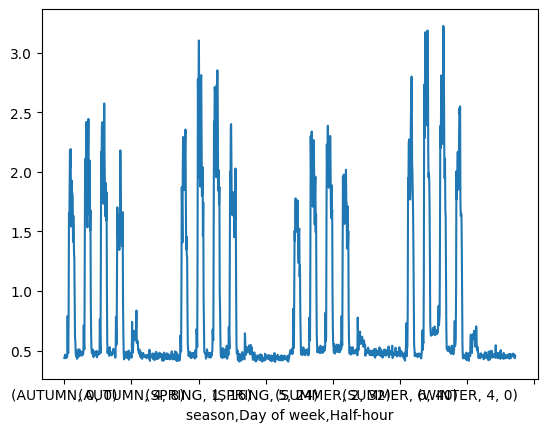

In [7]:
test_groupby = new_test.groupby()
test_groupby['DB_10'].plot()
test_groupby

In [22]:
test_groupby.index

MultiIndex([('AUTUMN', 0,  0),
            ('AUTUMN', 0,  1),
            ('AUTUMN', 0,  2),
            ('AUTUMN', 0,  3),
            ('AUTUMN', 0,  4),
            ('AUTUMN', 0,  5),
            ('AUTUMN', 0,  6),
            ('AUTUMN', 0,  7),
            ('AUTUMN', 0,  8),
            ('AUTUMN', 0,  9),
            ...
            ('WINTER', 6, 38),
            ('WINTER', 6, 39),
            ('WINTER', 6, 40),
            ('WINTER', 6, 41),
            ('WINTER', 6, 42),
            ('WINTER', 6, 43),
            ('WINTER', 6, 44),
            ('WINTER', 6, 45),
            ('WINTER', 6, 46),
            ('WINTER', 6, 47)],
           names=['season', 'Day of week', 'Half-hour'], length=1344)

Datetime
2022-01-31    1228.459510
2022-02-28    1145.818703
2022-03-31    1381.859129
2022-04-30    1128.350282
2022-05-31    1209.088607
2022-06-30    1141.268712
2022-07-31    1149.948142
2022-08-31    1173.068697
2022-09-30    1100.264971
2022-10-31    1113.377128
2022-11-30    1230.429431
2022-12-31    1371.818252
Freq: M, Name: DB_10, dtype: float64

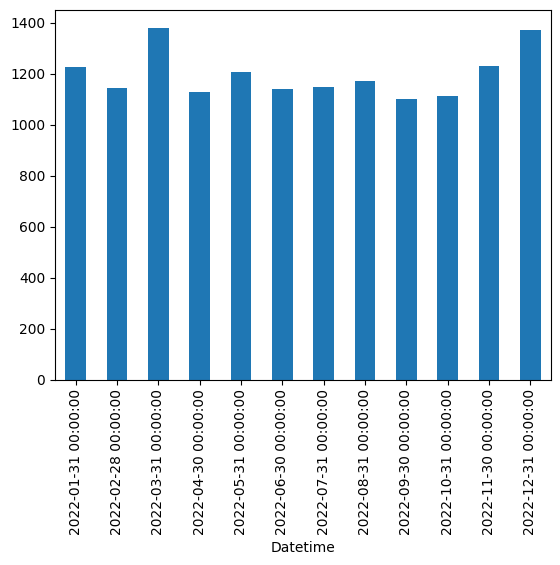

In [8]:
test_resample = new_test.resample(freq='M', func=np.sum)
test_resample['DB_10'].plot(kind='bar')
test_resample['DB_10']

Datetime
2022-02-03 08:00:00    1.922017
2022-02-03 08:30:00    1.552768
2022-02-03 09:00:00    1.968656
2022-02-03 09:30:00    1.370491
2022-02-03 10:00:00    1.332494
2022-02-03 10:30:00    1.007231
2022-02-03 11:00:00    1.672568
2022-02-03 11:30:00    1.576515
2022-02-03 12:00:00    1.422924
2022-02-03 12:30:00    1.572437
2022-02-03 13:00:00    1.756300
2022-02-03 13:30:00    1.100966
2022-02-03 14:00:00    1.553487
2022-02-03 14:30:00    1.400834
2022-02-03 15:00:00    1.396964
2022-02-03 15:30:00    1.709453
2022-02-03 16:00:00    1.819232
2022-02-03 16:30:00    1.445062
2022-02-03 17:00:00    0.474569
2022-02-03 17:30:00    0.397673
Name: DB_10, dtype: float64

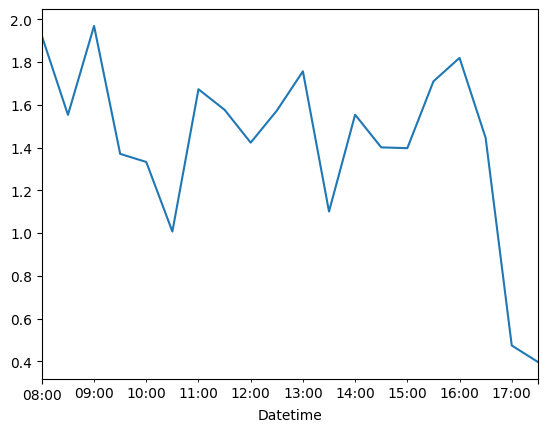

In [9]:
test_filter = new_test.filter(year=[2022], month=[2], day=[3], hour=[8,9,10,11,12,13,14,15,16,17])
test_filter['DB_10'].plot()
test_filter['DB_10']

### Column meta data + timeseries classes

In [11]:
# db_11 = sdp.ColumnVizData(testing_submeters['DB_11'], example_data_dict['column_1'])


ColumnVizData(data=Datetime
2022-01-01 00:00:00     7.569785
2022-01-01 00:30:00     6.771641
2022-01-01 01:00:00     8.596677
2022-01-01 01:30:00     7.786236
2022-01-01 02:00:00     6.929411
                         ...    
2022-12-31 21:30:00     9.456592
2022-12-31 22:00:00    10.520131
2022-12-31 22:30:00     8.988758
2022-12-31 23:00:00     9.155125
2022-12-31 23:30:00    10.842518
Name: DB_11, Length: 17520, dtype: float64, column_data={'Name': 'DB_11', 'Units': <UnitsSchema.KWH: ('kWh', 'Energy')>, 'Freq': '30T', 'Type': <DataType.FLOAT: <class 'float'>>})

In [12]:
# column_lists = sdp.generate_column_classes(testing_submeters, example_data_dict)


### Idea of next step

In [ ]:
# data_to_plot = new_test.filter()

# new_test.plot(matplotlibViz)

# def plot(self, list_col_to_plot:list[tuple[str,...]]|None=None, viz:LibraryViz)
  
#   for c in list_col_to_plot:
#     key_args = self.get_metatdata(c)
#     viz.plot(data_to_plot[c], key_args )

---

## Secondary example

In [14]:
import src.chpqa_test_files.import_data as import_data

user_path =  Path(r"/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/") # Rhys
#user_path =  Path(r"/Users/sceac10/Library/CloudStorage/GoogleDrive-alexandre.canet@e2s.energy/Shared drives/") # Alex
path = user_path / r"e2s-softwares/Lyra/06 - Prototypes/CHPQA/03 - Data/"

dataf = import_data.compile_data(path).pipe(import_data.clean_data).pipe(import_data.transform_raw_dataf)
dataf = dataf.loc[dataf.index.drop_duplicates()]

In [15]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(dataf, cleaner_list)

Prior to cleaning:


,CHP_electricity,CHP_total_heat,CHP_heat,CHP_gas,Boiler_1_heat,Boiler_2_heat,Boiler_3_heat,Boiler_1_gas,Boiler_2_gas,Boiler_3_gas,Total_heat_MWh,Total_gas_MWh
Count,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04
NaN Count,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Mean,0.520265,0.395913,0.395913,1.258410e+02,0.028807,0.174555,0.263088,3.448231,20.674429,31.133961,0.862363,1.810976e+02
StD,0.143987,0.134149,0.134149,3.473529e+01,0.116720,0.208813,0.325645,13.416414,23.658229,38.386887,0.383523,5.057193e+01
Min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,4.700000e+01
25%,0.523000,0.400000,0.400000,1.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.430000e+02
50%,0.570000,0.400000,0.400000,1.380000e+02,0.000000,0.100000,0.000000,0.000000,13.000000,0.000000,0.800000,1.760000e+02
75%,0.584000,0.500000,0.500000,1.410000e+02,0.000000,0.300000,0.600000,0.000000,36.000000,69.000000,1.200000,2.220000e+02
99%,0.590000,0.600000,0.600000,1.440000e+02,0.700000,0.700000,0.900000,81.000000,83.000000,108.000000,1.700000,2.830000e+02


Post cleaning:


,CHP_electricity,CHP_total_heat,CHP_heat,CHP_gas,Boiler_1_heat,Boiler_2_heat,Boiler_3_heat,Boiler_1_gas,Boiler_2_gas,Boiler_3_gas,Total_heat_MWh,Total_gas_MWh
Count,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.0,17520.000000,17520.000000,17520.0,17520.000000,17520.000000,17520.000000,1.752000e+04
NaN Count,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00
Mean,0.558354,0.425817,0.425817,1.350063e+02,0.0,0.171312,0.263088,0.0,20.443276,31.133961,0.861707,1.810195e+02
StD,0.031884,0.078529,0.078529,7.402979e+00,0.0,0.200155,0.325645,0.0,22.978181,38.386887,0.381857,5.006251e+01
Min,0.434000,0.299000,0.299000,1.060000e+02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.700000e+01
1%,0.470000,0.300000,0.300000,1.150000e+02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.300000,4.800000e+01
25%,0.537000,0.400000,0.400000,1.300000e+02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.430000e+02
50%,0.574000,0.400000,0.400000,1.380000e+02,0.0,0.100000,0.000000,0.0,13.000000,0.000000,0.800000,1.760000e+02
75%,0.584000,0.500000,0.500000,1.410000e+02,0.0,0.300000,0.600000,0.0,36.000000,69.000000,1.200000,2.220000e+02
99%,0.590000,0.600000,0.600000,1.440000e+02,0.0,0.700000,0.900000,0.0,78.682208,108.000000,1.700000,2.810000e+02


In [16]:
chpqa_data_dict = {'column_1': {'Name': 'CHP_electricity', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_2': {'Name': 'CHP_total_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_3': {'Name': 'CHP_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_4': {'Name': 'CHP_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_5': {'Name': 'Boiler_1_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_6': {'Name': 'Boiler_2_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_7': {'Name': 'Boiler_3_heat', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_8': {'Name': 'Boiler_1_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_9': {'Name': 'Boiler_2_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_10': {'Name': 'Boiler_3_gas', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_11': {'Name': 'Total_heat_MWh', 
                                  'Units': viz_enums.UnitsSchema.MWH,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                  'column_12': {'Name': 'Total_gas_MWh', 
                                  'Units': viz_enums.UnitsSchema.SM3,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

In [17]:
column_lists = sdp.generate_column_classes(dataf, chpqa_data_dict)

In [18]:
column_lists[0].data.min()

0.0

In [19]:
# data_with_meta.groupby('day', )
matplotlib_viz = MatplotlibViz()


def single_timeserie_plot(libraryViz, data, **kwargs):
    libraryViz.basic_plot(data, **kwargs)


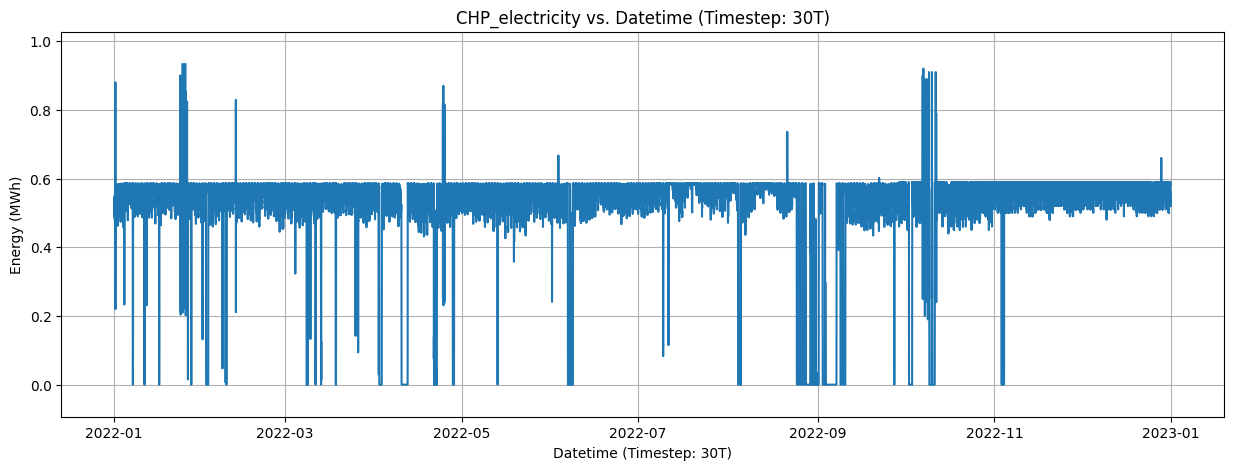

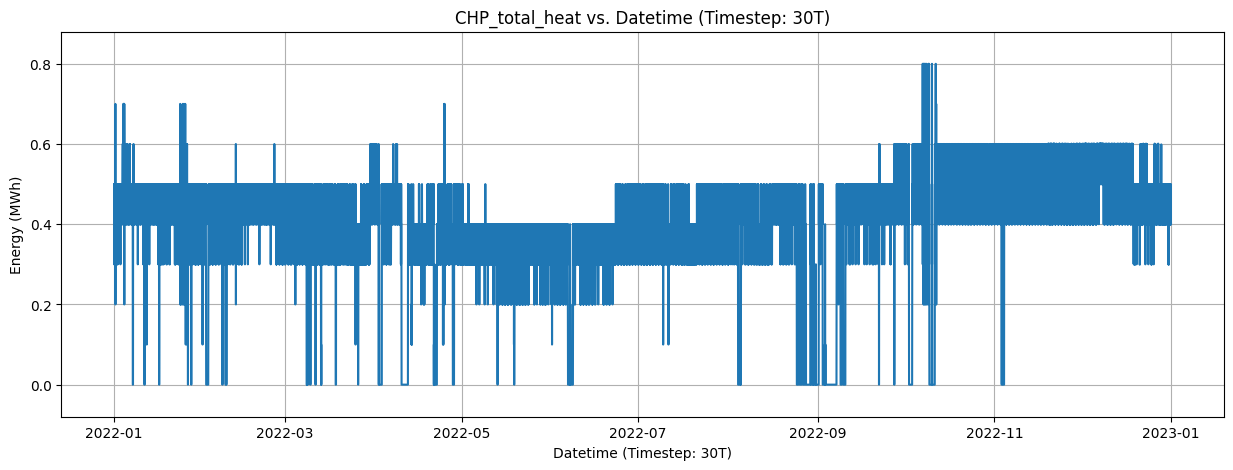

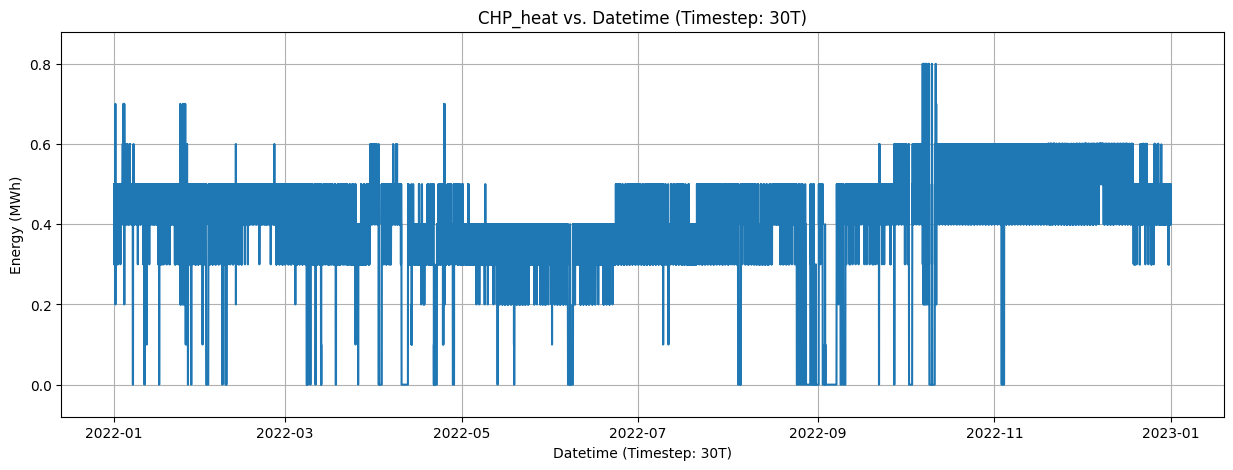

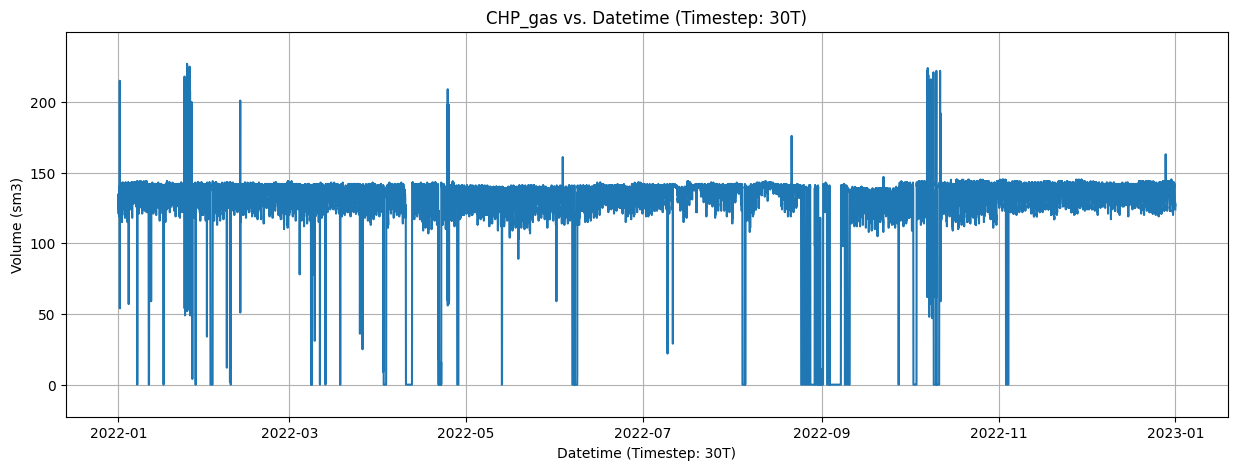

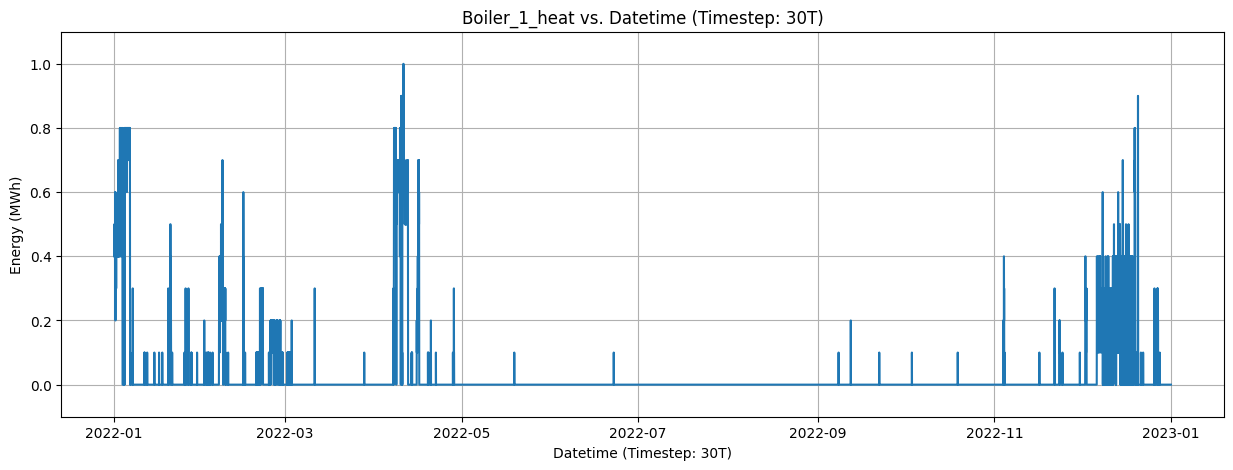

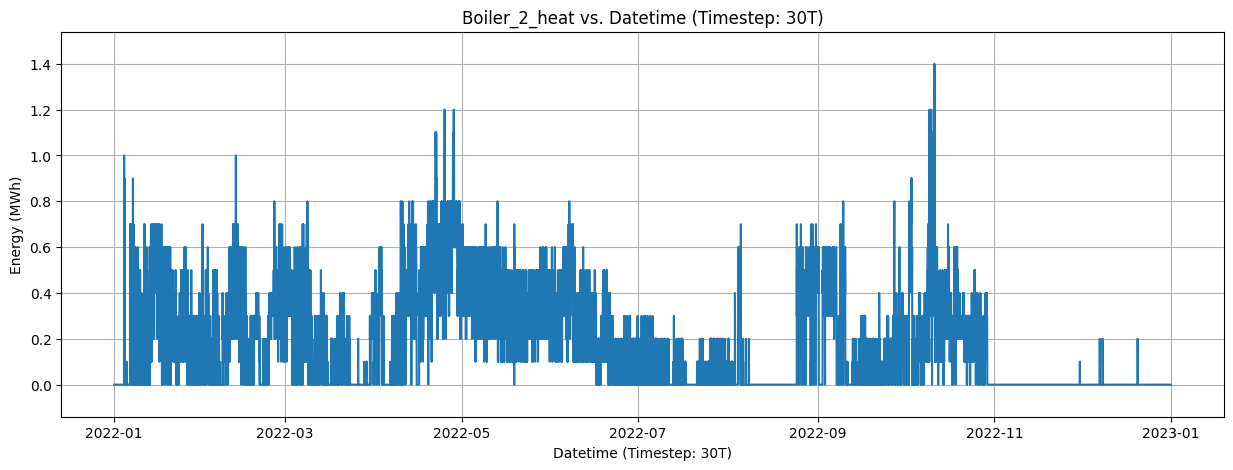

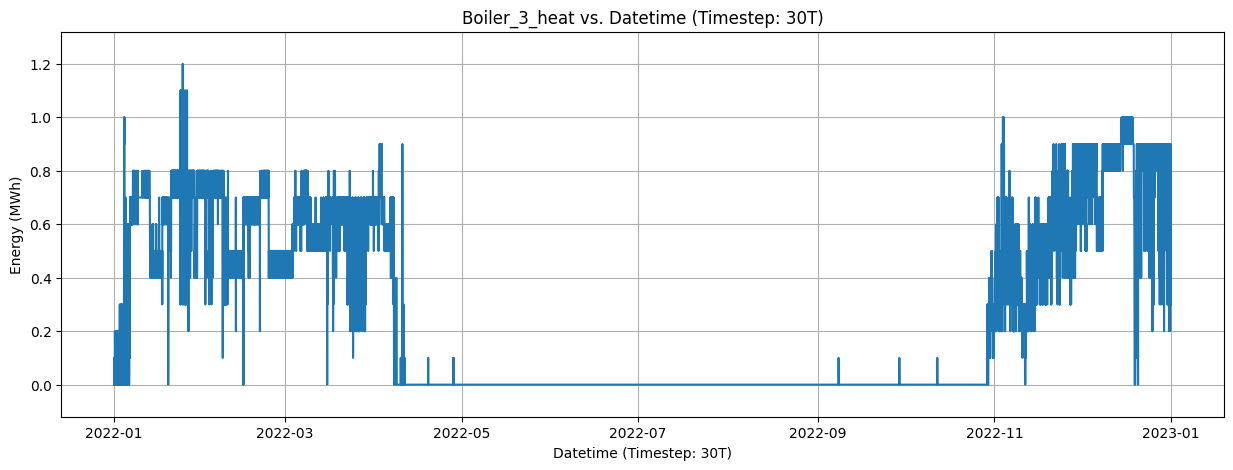

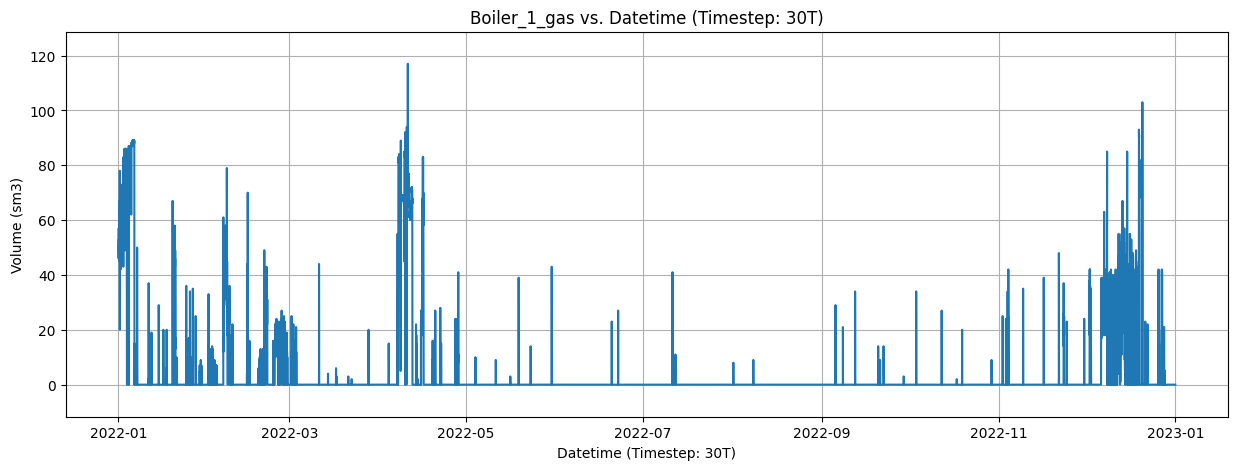

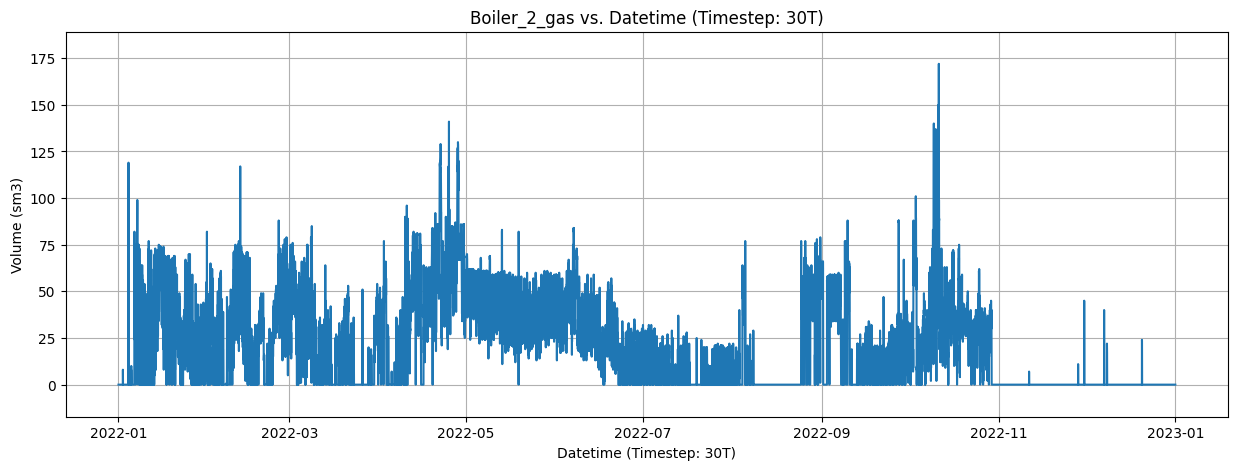

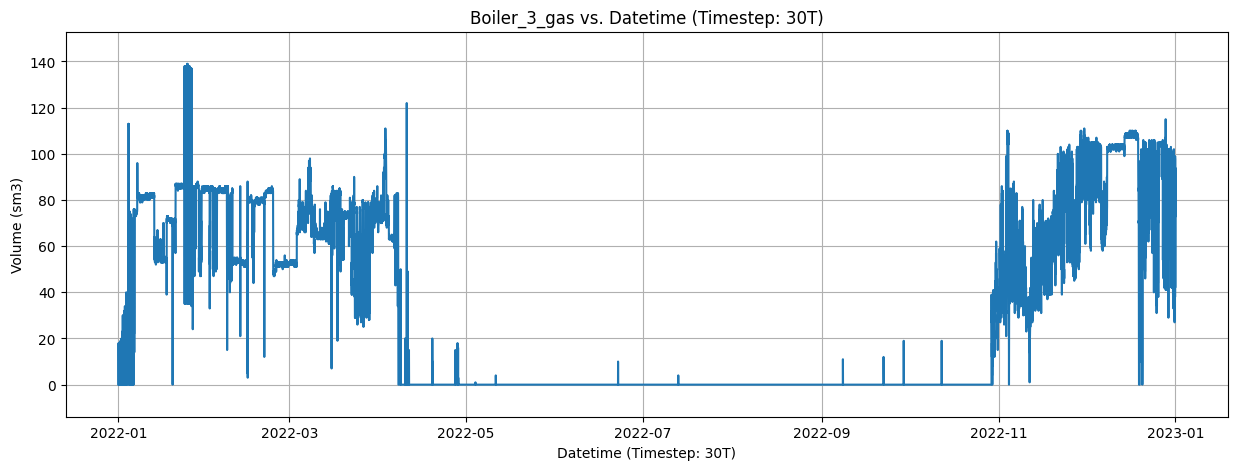

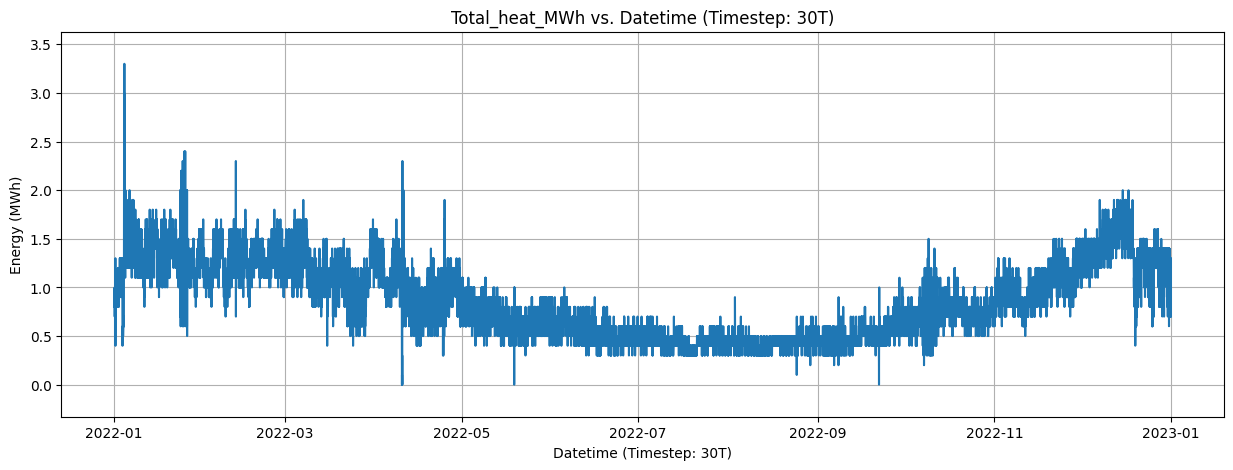

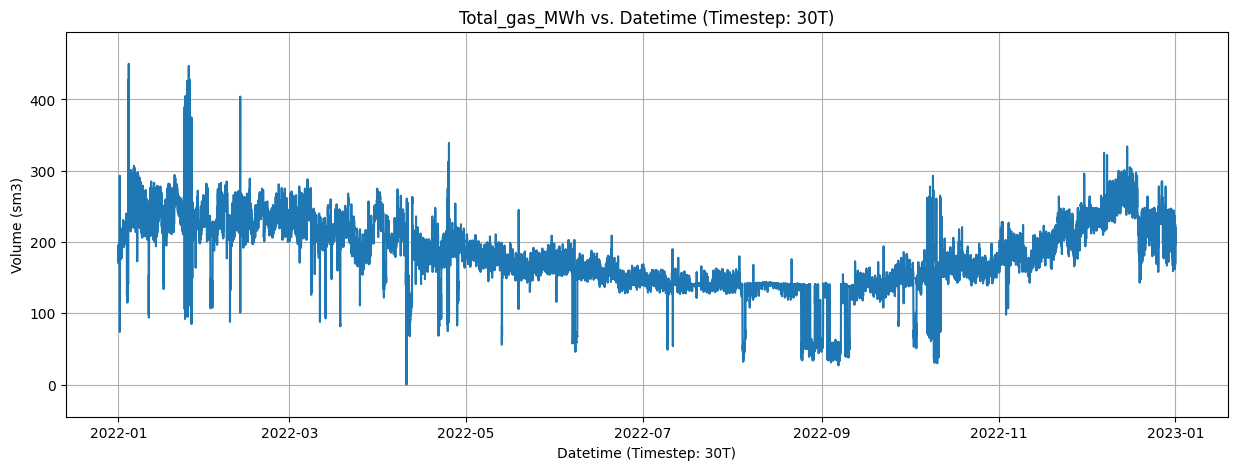

In [20]:
for i in range(len(column_lists)):
    column_lists[i].plot_all()